# GPT 4o Mini with baseline prompt

This notebook outlines the steps undertook to generate a prediction using GPT 4o Mini with baseline prompt.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import baseline_instructions
MODEL_ID = "gpt-4o-mini-2024-07-18"
SYSTEM_PROMPT = baseline_instructions

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

In [3]:
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:root:Completed: 5
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 8
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 47.8 s, sys: 4.57 s, total: 52.4 s
Wall time: 11min 14s


[{'0001.91306_cites_88061.txt': {'model': 'gpt-4o-mini-2024-07-18',
   'input_tokens': 1570,
   'output_tokens': 132,
   'prediction': 'yes',
   'confidence': 0.95,
   'rationale': 'The court explicitly states that the original decision in Texas v. White has been questioned and limited in important particulars, and it concludes that the position taken in that case must be regarded as overruled. This meets the criteria for overruling as it indicates that the case is no longer considered good law in certain contexts, specifically regarding the negotiability of bonds and the implications of their redeemability. The language used is functionally equivalent to explicitly overruling the case, thus confirming that Texas v. White has been overruled.',
   'raw_results': '{\n  "overruled": "yes",\n  "confidence": 0.95,\n  "rationale": "The court explicitly states that the original decision in Texas v. White has been questioned and limited in important particulars, and it concludes that the posit

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,gpt-4o-mini-2024-07-18,1570,132,yes,0.95,The court explicitly states that the original ...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.95..."
1,0004.91306_cites_88240.txt,gpt-4o-mini-2024-07-18,797,124,no,0.90,The passage discusses the case Texas v. Harden...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
2,0003.91306_cites_87633.txt,gpt-4o-mini-2024-07-18,821,128,no,0.90,The passage discusses the rules established in...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
3,0005.91306_cites_88693.txt,gpt-4o-mini-2024-07-18,799,141,no,0.90,The passage discusses the case <targetCase>16 ...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
4,0002.91306_cites_88994.txt,gpt-4o-mini-2024-07-18,1284,154,no,0.90,The excerpts provided discuss the cases of Tex...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.9,\..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/6.gpt/0.gpt4o_mini_baseline_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/6.gpt/0.gpt4o_mini_baseline_prompt.csv")

In [25]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,gpt-4o-mini-2024-07-18,1570,132,yes,0.95,The court explicitly states that the original ...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.95..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,gpt-4o-mini-2024-07-18,1284,154,no,0.90,The excerpts provided discuss the cases of Tex...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.9,\..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,gpt-4o-mini-2024-07-18,821,128,no,0.90,The passage discusses the rules established in...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,gpt-4o-mini-2024-07-18,797,124,no,0.90,The passage discusses the case Texas v. Harden...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,gpt-4o-mini-2024-07-18,799,141,no,0.90,The passage discusses the case <targetCase>16 ...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     618
yes    466
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

2065575

In [16]:
eval_df["output_tokens"].sum()

173604

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.96      0.64      0.77       935
         Yes       0.27      0.85      0.41       149

    accuracy                           0.67      1084
   macro avg       0.62      0.74      0.59      1084
weighted avg       0.87      0.67      0.72      1084



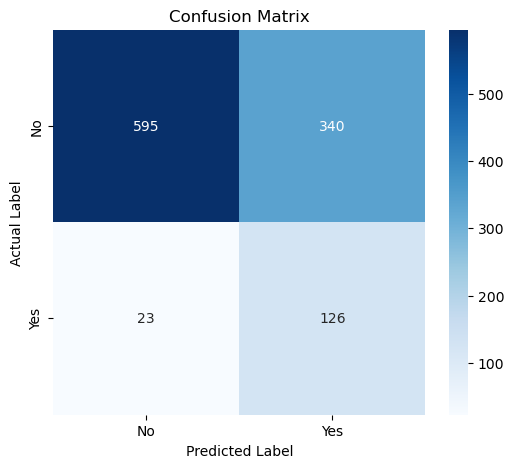

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.67
Precision: 0.27
Recall: 0.85
F-score: 0.41
Specificity: 0.64
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 126
True negatives: 595
False positives: 340
False negatives: 23


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

340

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

23

# Save the evaluation df

In [23]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,gpt-4o-mini-2024-07-18,1570,132,yes,0.95,The court explicitly states that the original ...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.95..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,gpt-4o-mini-2024-07-18,1284,154,no,0.90,The excerpts provided discuss the cases of Tex...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.9,\..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,gpt-4o-mini-2024-07-18,821,128,no,0.90,The passage discusses the rules established in...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,gpt-4o-mini-2024-07-18,797,124,no,0.90,The passage discusses the case Texas v. Harden...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,gpt-4o-mini-2024-07-18,799,141,no,0.90,The passage discusses the case <targetCase>16 ...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."


In [24]:
eval_df.to_csv("predictions/6.gpt/0.gpt4o_mini_baseline_prompt_eval.csv", index=False)